In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Прочитайте csv файл (використовуйте функцію read_csv)
# Виведіть перші п'ять рядків (використовується функція head)

cat_books = pd.read_csv('bestsellers with categories.csv')
cat_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [116]:
# Виведіть розміри датасету (використовуйте атрибут shape)

print(f"Number of rows {cat_books.shape[0]} and columns {cat_books.shape[1]}")

Number of rows 550 and columns 7


In [117]:
# Про скільки книг зберігає дані датасет?

cat_books = cat_books.drop_duplicates(subset='Name')
print(f"Number of books {cat_books.shape[0]}")

Number of books 351


In [118]:
cat_books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

cat_books

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


In [119]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть 
# кількість пропусків (na) у кожному зі стовпців 
# (використовуйте функції isna та sum)

cat_books.isna().sum()

# Чи є в якихось змінних пропуски?
# Відповідь: ні)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [120]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

cat_books['genre'].unique()

# Які є унікальні жанри?
# Відповідь: Non Fiction, Fiction

array(['Non Fiction', 'Fiction'], dtype=object)

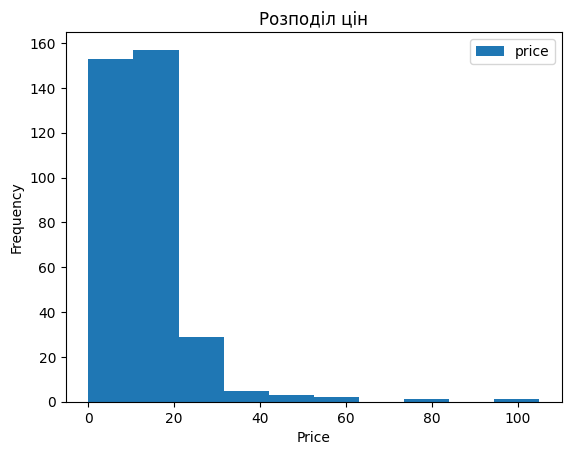

In [121]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

df = cat_books[['price']]
df.plot(kind='hist', title="Розподіл цін", xlabel='Price', ylabel='Frequency')
plt.show()


In [122]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

print(cat_books['price'].max())
print(cat_books['price'].min())
print(cat_books['price'].mean())
print(cat_books['price'].median())

# Відповідь: Максимальна ціна: 105
# Відповідь: Мінімальна ціна: 0
# Відповідь: Середня ціна: 13.076923076923077
# Відповідь: Медіанна ціна: 12.0

105
0
13.076923076923077
12.0


In [123]:
# Який рейтинг у датасеті найвищий? 
# Відповідь: 4.9

cat_books['user_rating'].max()

4.9

In [124]:
# Скільки книг мають такий рейтинг? 
# Відповідь: 28

result = cat_books.loc[cat_books['user_rating'] == 4.9]
result.shape[0]

28

In [125]:
# Яка книга має найбільше відгуків? 
# Відповідь: Where the Crawdads Sing

result = cat_books.loc[cat_books['reviews'] == cat_books['reviews'].max()]
result

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [126]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка 
# книга найдорожча (можна використати проміжний датафрейм)? 
# Відповідь: 19

result = cat_books[cat_books['year'] == 2015]
result.sort_values(by='price', ascending=False)

,name,author,user_rating,reviews,price,year,genre
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
492,The Wright Brothers,David McCullough,4.7,6169,16,2015,Non Fiction
483,The Whole30: The 30-Day Guide to Total Health ...,Melissa Hartwig Urban,4.6,7508,16,2015,Non Fiction
34,Being Mortal: Medicine and What Matters in the...,Atul Gawande,4.8,11113,15,2015,Non Fiction
149,Grey: Fifty Shades of Grey as Told by Christia...,E L James,4.4,25624,14,2015,Fiction
447,The Pioneer Woman Cooks: Dinnertime - Comfort ...,Ree Drummond,4.8,3428,14,2015,Non Fiction
528,What Pet Should I Get? (Classic Seuss),Dr. Seuss,4.7,1873,14,2015,Fiction
35,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2015,Non Fiction


In [127]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
# Відповідь: 17

result = cat_books[(cat_books['year'] == 2010) & (cat_books['genre'] == 'Fiction')]
result.shape[0]

17

In [128]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 
# 2010 та 2011 роках (використовуйте | або функцію isin)? 
# Відповідь: 1

result = cat_books[((cat_books['year'] == 2010) | (cat_books['year'] == 2011)) & (cat_books['user_rating'] == 4.9)]

result

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [129]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, 
# які потрапили до рейтингу в 2015 році і коштують дешевше за 
# 8 доларів (використовуйте функцію sort_values).

result = cat_books[(cat_books['year'] == 2015) & (cat_books['price'] < 8)]

result = result.sort_values(by='price')

result

,name,author,user_rating,reviews,price,year,genre
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


In [130]:
# Яка книга остання у відсортованому списку? 
# Відповідь: Old School (Diary of a Wimpy Kid #10)

print(result['name'].values[-1])

Old School (Diary of a Wimpy Kid #10)


In [131]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів 
# (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min).
# Максимальна ціна для жанру Fiction: 
# Відповідь: 82
# Мінімальна ціна для жанру Fiction: 
# Відповідь: 0
# Максимальна ціна для жанру Non Fiction: 
# Відповідь: 105
# Мінімальна ціна для жанру Non Fiction:
# Відповідь: 0

result = cat_books[['price', 'genre']].groupby('genre').agg(['min', 'max'])

print(result)

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


In [142]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів 
# (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
# Якої розмірності вийшла таблиця? 
# Відповідь: (248, 1)
# Який автор має найбільше книг? 
# Відповідь: Jeff Kinney
# Скільки книг цього автора? 
# Відповідь: 12

result_author = cat_books[['author', 'name']].groupby('author').agg('count')

print(result_author)

print(result_author.shape)

print(result_author.idxmax())

print(result_author.max())

print(result_author.sort_values(by='name', ascending=False).head())

                            name
author                          
Abraham Verghese               1
Adam Gasiewski                 1
Adam Mansbach                  1
Adir Levy                      1
Admiral William H. McRaven     1
...                          ...
Walter Isaacson                2
William Davis                  1
William P. Young               1
Wizards RPG Team               1
Zhi Gang Sha                   2

[248 rows x 1 columns]
(248, 1)
name    Jeff Kinney
dtype: object
name    12
dtype: int64
                 name
author               
Jeff Kinney        12
Rick Riordan       10
Stephenie Meyer     7
J.K. Rowling        6
Bill O'Reilly       6


In [141]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора 
# (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).
# У якого автора середній рейтинг мінімальний? 
# Відповідь: Donna Tartt
# Який у цього автора середній рейтинг? 
# Відповідь: 3.9

result_user_rating = cat_books[['author', 'user_rating']].groupby('author').agg('mean')

print(result_user_rating.idxmin())

print(result_user_rating.min())

print(result_user_rating.sort_values(by='user_rating').head())

user_rating    Donna Tartt
dtype: object
user_rating    3.9
dtype: float64
                   user_rating
author                        
Donna Tartt                3.9
Muriel Barbery             4.0
Gillian Flynn              4.0
Gallup                     4.0
Ian K. Smith M.D.          4.1


In [146]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг 
# (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
# Який автор перший у списку?
# Відповідь: Donna Tartt

result = pd.concat([result_author, result_user_rating], axis=1)
result.sort_values(by=['name', 'user_rating'])

,name,user_rating
author,,
Donna Tartt,1,3.900000
Gallup,1,4.000000
Gillian Flynn,1,4.000000
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
...,...,...
Bill O'Reilly,6,4.633333
Dav Pilkey,6,4.900000
Stephenie Meyer,7,4.657143


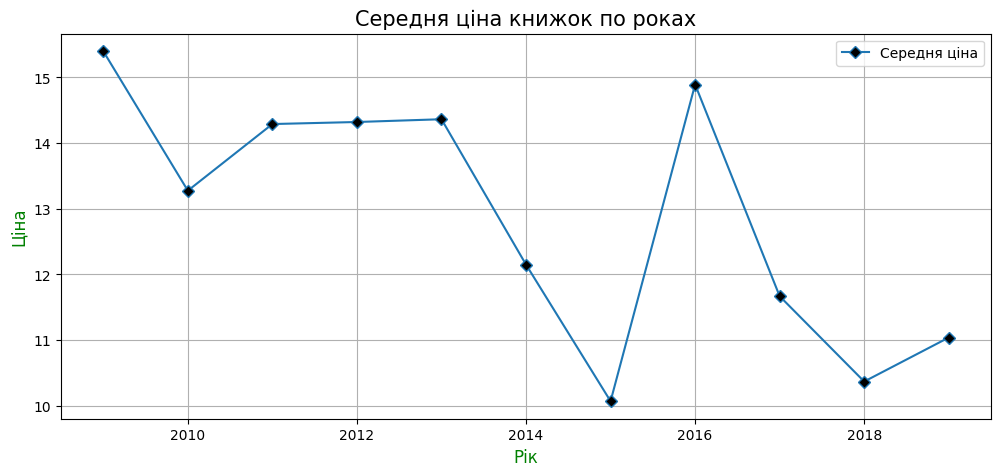

In [164]:
graf1 = cat_books[['price', 'year']].groupby('year').mean()
graf1.plot(figsize=(12,5), marker='D', markerfacecolor='black')
plt.xlabel("Рік", fontsize="large", color="Green")
plt.ylabel("Ціна", fontsize="large", color="Green")
plt.title("Середня ціна книжок по роках", fontsize=15)
plt.legend(['Середня ціна'])
plt.grid()
plt.show()

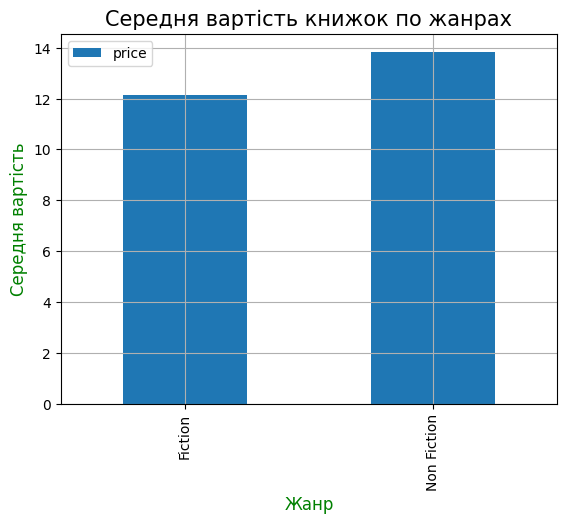

In [178]:
graf2 = cat_books[['price', 'genre']].groupby('genre').mean()
graf2.plot(kind="bar")
plt.xlabel("Жанр", fontsize="large", color="Green")
plt.ylabel("Середня вартість", fontsize="large", color="Green")
plt.title("Середня вартість книжок по жанрах", fontsize=15)
plt.grid()
plt.show()

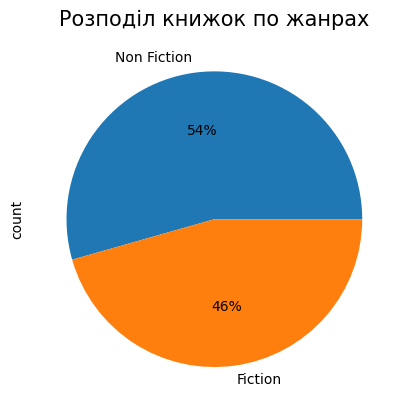

In [187]:
graf3 = cat_books['genre'].value_counts()
graf3.plot(kind="pie", autopct='%.0f%%')
plt.title("Розподіл книжок по жанрах", fontsize=15)
plt.labels=['Fiction','Non Fiction']
plt.show()